# Data Science Lab: Lab 1

Submit:

A pdf of your notebook with solutions.
A link to your colab notebook or also upload your .ipynb if not working on colab.

**Goals of this Lab:**
1.  Review important results from probability, such as the CLT.
2.  Connecting that review with basic Python commands.
3.  Practice with Pandas, Numpy and Data Exploration.


In [2]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility
rng = default_rng()

C:\Users\tonys\AppData\Local\Temp\ipykernel_32108\383175047.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 1

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}20 & 0.8\\0.8 & 30\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


# Solution:

We can find the mean and variance as before (albeit with 2 dimensions instead of 1). To find the covariance though between two random variables, we use the following equation.

$$Cov(X, Y) = \frac{1}{N-1} \sum_{j = 1}^{N}(X_{j}- \mu_{x})*(Y_{j}- \mu_{y}) $$

In [3]:
samples = 100000
mu = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]

# Part 1 Solution
# 1000 samples from bivariate Normal distribution
# with given mu and covariance matrix
x, y = rng.multivariate_normal(mu, cov, samples).T



[]

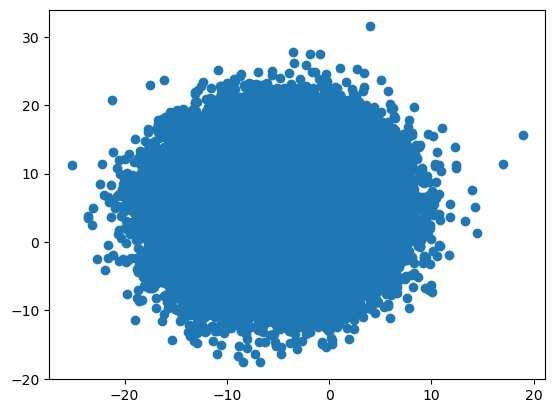

In [4]:
# Part 2 solution
# We can plot the points to see what they look like
plt.scatter(x, y)
plt.plot()

In [5]:
# Part 3 solution
E, V = np.linalg.eigh(cov)
print('These are the eigenvalues:', E)
print('These are the eigenvectors:', V)


These are the eigenvalues: [19.93640444 30.06359556]
These are the eigenvectors: [[-0.99685521  0.07924446]
 [ 0.07924446  0.99685521]]


[]

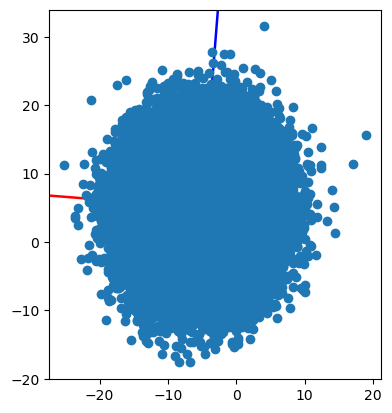

In [6]:
# We can plot the eigenvectors on the same plot as the points
origin = np.array([[-5, -5],[5, 5]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=1.5)
plt.scatter(x, y)
axes = plt.gca()
axes.set_aspect(1) # set aspect ratio to 1 to see the alignment
#axes.set_aspect('equal', 'box')

plt.plot()

In [7]:
# Part 4 solution

#compute means
meanX = np.sum(x) / samples
meanY = np.sum(y) / samples

mean = [meanX, meanY]

#compute the variance as before and the covariance
#using the equation for computing covariance
varX = np.sum((x - meanX)**2) / (samples - 1.0)
varY = np.sum((y - meanY)**2) / (samples - 1.0)

#compute covariance between x and y, as n increases this should approach 0.8
covXY = np.dot((x - meanX),(y - meanY)) / (samples - 1.0)

covMatrix = np.array([[varX, covXY], [covXY, varY]])

#print out the mean and covariance matrix
print("Mean:\n", mean, "\n")
print("Covariance:\n", covMatrix)

Mean:
 [-5.005088898042893, 4.981431298663645] 

Covariance:
 [[19.93837244  0.72997534]
 [ 0.72997534 29.8682896 ]]


# Problem 2: Central Limit Theorem

Back in EE351K you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. **Note:** To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.

# Solution

As we see from the results below, for fewer samples drawn the random variable $Z_{n}$ appears more triangular. While there may be more values of $Z_{n}$ that tend to be closer to 0, it doesn't follow the typical Gaussian curve. As n gets much larger, we can see the Gaussian curve with very few extreme values and a much smaller variance as well.


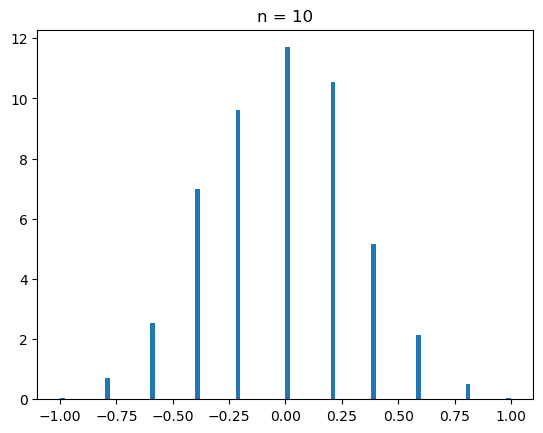

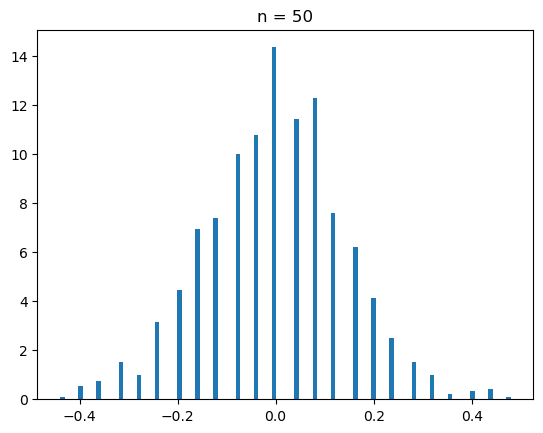

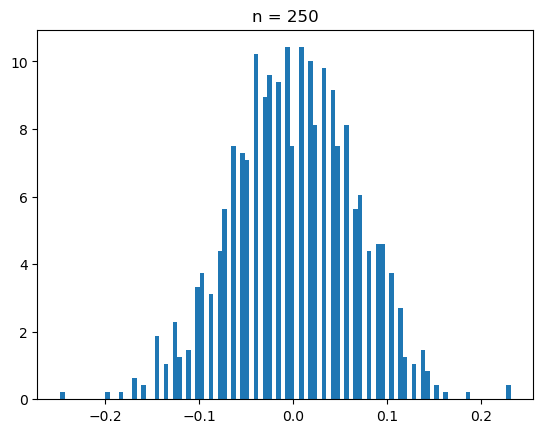

In [10]:
def plotBernoulliSum(n):
    data = []
    #take 1000 samples from Zn
    for x in range(0, 1000):
        sampleSum = 0
        #create one sample of Zn by summing n Binomial samples
        # to create one Bernoulli sample
        for y in range(0, n):
            #sample from Binomial distribution and adjust values
            # to match the {-1, 1} set
            sample = np.random.binomial(1, 0.5)
            if sample == 0:
                sample -= 1
            sampleSum += sample
        sampleSum /= float(n)
        #add sample to data set
        data.append(sampleSum)
    #display data with n
    plt.title("n = %d" % n)
    plt.hist(data, 100,density=True)
    plt.show()

#Create plots for each value of n
plotBernoulliSum(10)
plotBernoulliSum(50)
plotBernoulliSum(250)

# Problem 3

Download from Canvas/Files the datasetPatientData.csv. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

In [11]:
# Upload the train file from your local drive
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Read data specifying the data to be float values and missing values to have ?
#no header (names of columns)
data = pd.read_csv('PatientData.csv', header=None, dtype=np.float64, na_values='?')

#Find the number of features and patients
features = len(data.iloc[0])-1 #Subtract one because last column is output
patients = len(data)
print("Features: ", features)
print("Patients: ", patients)

#Replace any missing values with the mean of the columns/features
newData = data.fillna(data.mean())

plt.hist(data.T.iloc[0], bins=50)
plt.show()
plt.hist(data.T.iloc[1], bins=10)
plt.show()
plt.hist(data.T.iloc[2], bins=100)
plt.show()
plt.hist(data.T.iloc[3], bins=100)
plt.show()


#Write the new data back to a new file
newData.to_csv('PatientDataFixed.csv')

Part 1: There 279 features (+ condition feature) and 452 patients (aka samples).

Part 2: With these being medical records and the first column being in the range of 0 to 80, it can be assumed that this first feature is very likely the age of the patient. The second feature is binary and pretty evenly ditributed so it's most likely gender. The third and fourth features are more difficult to ascertain without being given forknowledge, but reasonable guesses could be blood pressure and heart rate.

Part 3: There are several missing values specified as being "?" in the data. They can be filled in with one line of code using pandas as seen above.

Part 4:  There are various ways to determine feature importance and this is an active area of machine learning study. Possible ways to determine importance include using decision trees (e.g., xgboost feature selection), f scores, pca/lda (largest eigenvalue eigenvectors), highest correlation with output variable, standardized regression coefficients, change in R^2/other metrics as variable is added to rest of variables, and others. Depending on which methods you use, you can determine that different features are most important. At the end of the day, the goal is to predict the output variable while minimizing (or maximizing) some metric, so pick all or some features that help with this.

# Problem 4

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Part 1. Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX.

Part 2. Write a program that on input Name returns the frequency for men and women of the name Name.

Part 3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency.

Part 4. Find all the names that used to be more popular for one gender, but then became more popular for another gender.

•(Optional) Find something cool about this data set.

In [ ]:
#create pandas dataframe from one .txt file
def getData(year):
    #read the .txt file into a dataframe to work with
    return pd.read_csv("./yob%s.txt" % year ,names = ["Name", "Gender", "Number"])

#find the k largest names by year
def top_k_by_year(k, year):
    data = getData(year)
    return data.nlargest(k, 'Number')['Name']

#find the number of occurences of a particular name in a certain year for both males and females
def name_frequency(name, year):
    data = getData(year)

    #find all the people in a particular year with the same name and each gender
    male_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'M')]
    female_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'F')]

    male_count = male_result.values[0] if not male_result.empty else 0
    female_count = female_result.values[0] if not female_result.empty else 0
    return male_count, female_count

#find the occurences of a name in our dataset:
def name_frequency_all_years(name):
    male_count_total = 0
    female_count_total = 0
    for year in range(1880,2016):
        male_count, female_count = name_frequency(name, year)
        male_count_total += male_count
        female_count_total += female_count

    return male_count_total, female_count_total

#find the frequency of a name, relative to the total number of different names that year
def relative_frequency(name, year):
    data = getData(year)
    male_name_count, female_name_count = name_frequency(name, year)

    #sum up the number of names in a year, and then return the relative frequencies per gender
    total = float(np.sum(data,axis=0)[2])
    return male_name_count / total, female_name_count / total

#find the frequency of a name over the course of all the records
def get_every_year_frequency(name, relative=False):
    data = []
    for year in range(1880, 2016):
        #get data
        df = getData(year)
        df['Year'] = year
        if not relative:
            #if not relative, add new Frequency column with absolute frequency values
            male_freq, female_freq = name_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        else:
            #if not relative, add new Frequency column with relative frequency values
            male_freq, female_freq = relative_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        #add yearly data to collection of data using only the year, name, frequency, and gender columns
        data.append(df.loc[(df['Name'] == name) & (df['Year'] == year), ('Year', 'Name', 'Frequency', 'Gender')])
    #create one dataframe from the array of smaller dataframes
    data = pd.concat(data)
    return data

#plot the frequency of a name over time
def plot_frequency_data(data, name='', relative=False):
    sns.set_style('whitegrid')
    f = plt.figure(figsize=(18, 8))

    sns.pointplot(data=data, x='Year', y='Frequency', hue='Gender')
    sns.despine()
    f.tight_layout()

    plt.title('Frequency of %s throughout US population' % (name))
    if not relative:
        plt.ylabel('Absolute Frequency')
    else:
        plt.ylabel('Relative Frequency (% of population)')

    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()

#find which names started off being more popular for one gender and later switched to another gender
def find_more_popular():
    data = []
    for year in range(1880,2016):
        df = getData(year)
        df['Year'] = year
        data.append(df)

    data = pd.concat(data)

    #create new diff column with number of names positive for males and negative for females
    data["diff"] = data["Gender"].map({'M':1,'F':-1})
    data["diff"] = data["diff"] * data["Number"]

    #group data by name and year, sum up the columns, and drop the year column
    data = data.groupby(["Name","Year"]).sum()
    data = data.reset_index().drop('Year',1)

    #for each name, create new columns with the minimum value (i.e. females) and maximum value (i.e. males)
    data = data.groupby('Name').agg({'diff':['min','max']})
    data.columns = ['min', 'max']

    #create new switch column which identifies if a name switched from positive to negative or vice verse
    data['switch'] = (np.sign(data["min"] * data['max']) == -1)

    #Remove data that didn't switch gender
    data = data[data['switch']].reset_index()

    return data['Name'].values

In [ ]:
# Upload the train file from your local drive
from google.colab import files
uploaded = files.upload()

Now we can call the functions above.

In [ ]:
# Part 1: Output Top K
print(top_k_by_year(100, 2000).to_string(index=False))

In [ ]:
# Part 2: Return the frequency for each year
data = get_every_year_frequency('Alex')
plot_frequency_data(data, name='Alex')

In [ ]:
data = get_every_year_frequency('Alex', relative=True)
plot_frequency_data(data, name='Alex', relative=True)

In [ ]:
# Part 3: Gender-switching popularity
print(find_more_popular()[0:100]) #print first 100 names

data = get_every_year_frequency('Aaren', relative=True)
plot_frequency_data(data, relative=True)

# Problem 5

We looked at the MNIST data set in class. Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision. You can find the MNIST data set which we will use, here: https://www.openml.org/d/554. Though we haven't introduced decision trees formally, we have had a chance to see them in action in class. This exercise is an opportunity to play around with this data set, and in advance of when we get to talk about decision trees in detail, have a chance to see how they work. In short, this is an exercise in learning-by-doing.


Part 1. (Nothing to submit) Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

Part 8. Fix the depth of the three, say, depth=7. Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points, always computing testing score by evaluating on the complement of the training set. Plot this trend.  Try to explain what you are seeing.  


# Solutions

See the colab notebook: https://colab.research.google.com/drive/1ZpqHuaKKeYP-ux5SEd9UrGtuCmGL8yFc?usp=sharing

Part 1. Nothing to submit.

Part 2. The X.shape command tells us: There are 70,000 data points, and 784 features.

Part 3.

* The digit  0 appears  6903 times
* The digit  1 appears  7877 times
* The digit  2 appears  6990 times
* The digit  3 appears  7141 times
* The digit  4 appears  6824 times
* The digit  5 appears  6313 times
* The digit  6 appears  6876 times
* The digit  7 appears  7293 times
* The digit  8 appears  6825 times
* The digit  9 appears  6958 times

Part 4. Partitions a data set into a training set and a testing set.

Part 5. It computes the accuracy of a classifier on a given data set (could be training or testing).

Part 6. The training score will increase. As we have more depth to the tree, we can fit better -- up until the point when we have simply memorized the data set, at which point we have perfect accuracy.

Part 7. The difference between training and testing will increase as we increase the depth. This is because training begins to overfit. More specifically, even before we are overfitting, each new layer of the tree is designed specifically for the training data. Thus, even if it improves the score on the testing data, on average it will not improve it as much as it improves the score on the training data.

Part 8. See the colab notebook.

# Problem 6

We now turn to a somewhat more sophisticated data set: CIFAR10.
Here is an initial colab notebook: https://colab.research.google.com/drive/1H3a4yVuZLatBvFjrUp5aFBJn_vfmXj7o?usp=sharing

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. There are two ``TO DOs'' listed in the colab notebook. Complete these.


If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!

# Solution

See the colab notebook: https://colab.research.google.com/drive/10Ea2B9IZXDr7OeMpbK9mLorAZY_v8Opu?usp=sharing

Part 1.

* There are 50000 training points.
* The label  airplane appears  [5000] times in the training data
* The label  automobile appears  [5000] times in the training data
* The label  bird appears  [5000] times in the training data
* The label  cat appears  [5000] times in the training data
* The label  deer appears  [5000] times in the training data
* The label  dog appears  [5000] times in the training data
* The label  frog appears  [5000] times in the training data
* The label  horse appears  [5000] times in the training data
* The label  ship appears  [5000] times in the training data
* The label  truck appears  [5000] times in the training data

Part 2. See the colab notebook.